# Normal Distribution Project


This repository contains my investigation of normal distribution as part of the Fundamentals of Data Assessment module of the Higher Diploma in Computing and Data Analytics at GMIT.

### Introduction

Normal distribution, also known as the Gaussian Distribution (after the German mathematician Carl Gauss who first described it), is the default probability for many real-world scenarios. It has two parameters: the mean and the standard deviation.  The mean is the numerical average of a data set and the standard deviation shows the variation in data.  The formula for standard deviation is [INSERT IMAGE].

The Normal Distribution is a continuous probability distribution. Continuous variables, as opposed to discrete variables which have finite values, can take on an unlimited number of values between the lowest and highest points of measurement.  When Normal Distribution is graphed, it is symmetrical on both sides of the mean having a distinctive bell shape and for this reason it is often also known as a 'Bell Curve'(see coded example below).  Most of the continuous data values in a normal distribution tend to cluster around the mean, tapering off symmetrically on either side.  The left and right tails of the curve approach but never quite meet the x-axis.  The further a value is from the mean, the less likely it is to occur.  

The normal distribution is considered to be the most important probability distribution in statistics because it accurately describes the distribution of values for many natural phenomena.  For example if 100 people were selected at random we would expect to see a normal distribution frequency curve for many continuous variables, such as height, weight and shoe sizes.  

Below is the code for a simple probability distribution plot representing standard normal distribution with a mean of 0 and a standard deviation of 1 in the range of -4 to 4. 

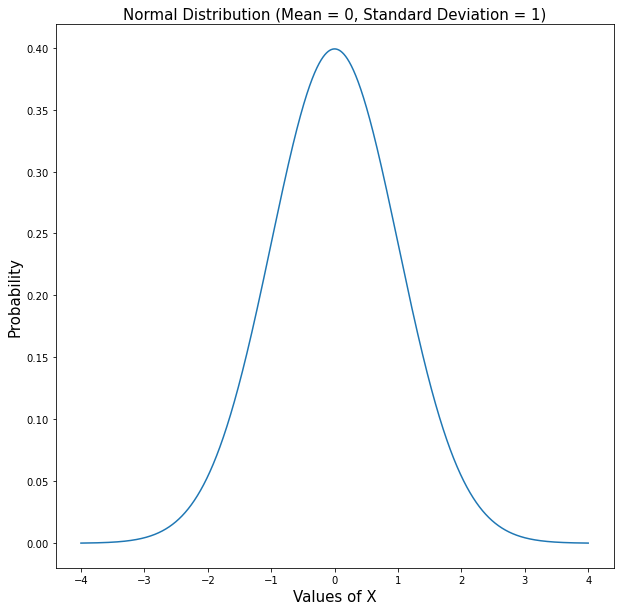

In [17]:
# Create a normal distribution with mean 0 and standard deviation 1

import numpy as np   #for math operations
import matplotlib.pyplot as plt   #to generate a plot
from scipy.stats import norm   #to generate normal distribution

# Plot between -4 and 4 with .001 steps
x_axis = np.arange(-4, 4, .001)

plt.figure(figsize=(10, 10))

# Mean = 0, SD = 1
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.title('Normal Distribution (Mean = 0, Standard Deviation = 1)', fontsize='15')
plt.xlabel('Values of X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()




### References

https://www.investopedia.com/terms/n/normaldistribution.asp#:~:text=Normal%20distribution%2C%20also%20known%20as,data%20far%20from%20the%20mean.

McLeod, S. A. (2019, May 28). Introduction to the normal distribution (bell curve). Simply psychology: https://www.simplypsychology.org/normal-distribution.html

https://vitalflux.com/normal-distribution-explained-python-examples/